# STEP 1 : Data preprocessing 

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib inline


In [39]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head(10)
len(dataset.columns)
dataset.shape
dataset.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [46]:
x = dataset.iloc[:, :-1].values


In [47]:
y = dataset.iloc[:,1].values


In [18]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN',strategy = 'mean', axis = 0)
imputer = imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
labelencoder_x.fit_transform(x[:, 0])
x[:, 0] = labelencoder_x.fit_transform(x[:, 0])

In [21]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [0])
x= onehotencoder.fit_transform(x).toarray()

In [22]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [45]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3,random_state = 0)
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

In [48]:
'''from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)'''

'from sklearn.preprocessing import StandardScaler\nsc_x = StandardScaler()\nx_train = sc_x.fit_transform(x_train)\nx_test = sc_x.transform(x_test)'

# STEP 2 :Fitting simple linear regression model to Training set 

In [49]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# STEP 3 : PREDICTING THE TEST RESULT

In [50]:
y_pred = regressor.predict(x_test)

In [51]:
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

# STEP 4 : VISUALIZING THE Training RESULT

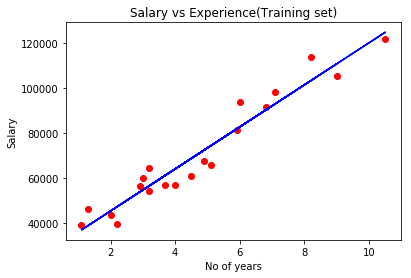

In [58]:
plt.scatter(x_train,y_train, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('No of years')
plt.ylabel('Salary')
plt.show()

# STEP 5 : VISUALIZING THE Test RESULT

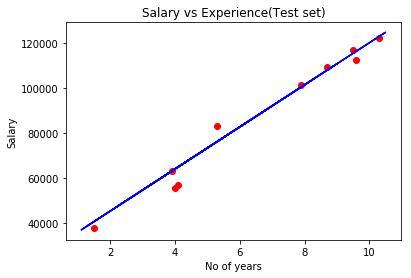

In [60]:
plt.scatter(x_test,y_test, color = 'red')
plt.plot(x_train,regressor.predict(x_train),color = 'blue')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('No of years')
plt.ylabel('Salary')
plt.show()